In [10]:
import random
import projetannuel

In [2]:
import random
import projetannuel

from lib_gridfs import load_posters_with_size, stock_metrics
imgs, genres = load_posters_with_size((15, 10), genres=['Horreur', 'Animation', 'Histoire'])
imgs_as_lists = [img.tolist() for img in imgs]
import numpy as np

imgs_as_lists = np.array(imgs_as_lists)/255.0

data = list(zip(imgs_as_lists, genres))
# filtered_data = [(img, genre) for img, genre in data if genre in ['Animation', 'Horreur']]
random.shuffle(data)
imgs_shuffled = [movie[0] for movie in data]
genres_shuffled = [movie[1] for movie in data]
# genres_shuffled_binarygenres_shuffled_binary = []
# for g in genres_shuffled:
#     .append(0 if g == "Horreur" else 1)
lim = int(len(data) * 0.8)
imgs_as_lists_train = imgs_shuffled[:lim]
genres_train = genres_shuffled[:lim]
imgs_as_lists_test = imgs_shuffled[lim:]
genres_test = genres_shuffled[lim:]

📦 Found 96 resized images of size 15x10


📥 Loading resized images: 100%|██████████| 96/96 [00:00<00:00, 662.11it/s]


🛠 Found 2895 fullsize images to resize to 15x10


📥 Loading resized images: 100%|██████████| 2962/2962 [00:01<00:00, 1494.64it/s]


np.float64(0.008912572902516253)

In [ ]:
from scipy.spatial.distance import pdist
import numpy as np

def median_pairwise_squared_distance(X):
    dists = pdist(X, metric='sqeuclidean')
    return np.median(dists)

gamma = 1.0 / (2 * median_pairwise_squared_distance(imgs_as_lists_train))


# RBF

In [4]:
param_grid = {
    'C': [10, 100, ],
    'gamma': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    "learning_rate": [0.001, 0.01, 0.05, 0.1],
    "epochs": [10000, 50000],
}

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [12]:
y = projetannuel.string_labels(genres_shuffled)
print(genres_shuffled)
print(y)

['Horreur', 'Horreur', 'Horreur', 'Histoire', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Histoire', 'Animation', 'Histoire', 'Horreur', 'Histoire', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Histoire', 'Histoire', 'Histoire', 'Histoire', 'Animation', 'Animation', 'Horreur', 'Horreur', 'Histoire', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Histoire', 'Horreur', 'Histoire', 'Horreur', 'Histoire', 'Histoire', 'Horreur', 'Horreur', 'Animation', 'Animation', 'Animation', 'Histoire', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Histoire', 'Animation', 'Horreur', 'Histoire', 'Horreur', 'Animation', 'Horreur', 'Histoire', 'Animation', 'Animation', 'Histoire', 'Histoire', 'Horreur', 'Histoire', 'Horreur', 'Histoire', 'Histoire', 'Horreur', 'Animation', 'Histoire', 'Histoire', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Histoire', 'Animation', 'Horreur', 'Histoire', 'Animation', 'Histoire', 'Histoire', 'Histoire', 'Histoire', 'Animation', 'Histoire', 

In [5]:
import itertools
best_score = 0.0
best_params = None
y = projetannuel.string_labels(genres_shuffled)

for c, gamma in itertools.product(
    param_grid["C"],
    param_grid["gamma"],
):
    model = projetannuel.RBF(
        imgs_shuffled,
        y,
        gamma = gamma,
        k = c,
        seed = 42
    )
    model.train_classification(epochs=1_000, learning_rate=0.01, algo="gradient-descent", x_test=imgs_shuffled, y_test=projetannuel.string_labels(genres_shuffled))
    Y_pred = [model.predict(x) for x in imgs_shuffled]
    acc = projetannuel.accuracy_score(genres_shuffled, Y_pred)
  
    prop = Y_pred.count("Horreur") / len(Y_pred)
  
    print(f"Proportion de 'Horreur' : {prop}")
    print(f"Tested: Gamma={gamma}, C={c}, acc={acc:.4f}")
  
    if acc > best_score:
        best_score = acc
        best_params = (gamma, c)

Proportion de 'Horreur' : 0.3022400534938148
Tested: Gamma=0.0001, C=10, acc=0.2568
Proportion de 'Horreur' : 0.18321631561350718
Tested: Gamma=0.001, C=10, acc=0.3143
Proportion de 'Horreur' : 0.4543630892678034
Tested: Gamma=0.01, C=10, acc=0.4901
Proportion de 'Horreur' : 0.5025075225677031
Tested: Gamma=0.1, C=10, acc=0.4300
Proportion de 'Horreur' : 0.0010030090270812437
Tested: Gamma=1, C=10, acc=0.3350
Proportion de 'Horreur' : 0.0
Tested: Gamma=10, C=10, acc=0.3343
Proportion de 'Horreur' : 0.0
Tested: Gamma=100, C=10, acc=0.3343
Proportion de 'Horreur' : 0.48311601471079907
Tested: Gamma=0.0001, C=100, acc=0.4728
Proportion de 'Horreur' : 0.49682380474757604
Tested: Gamma=0.001, C=100, acc=0.4868
Proportion de 'Horreur' : 0.46472751588097627
Tested: Gamma=0.01, C=100, acc=0.5045
Proportion de 'Horreur' : 0.3828151120026747
Tested: Gamma=0.1, C=100, acc=0.5152
Proportion de 'Horreur' : 0.001671681711802073
Tested: Gamma=1, C=100, acc=0.3323
Proportion de 'Horreur' : 0.001337345

In [19]:
y = projetannuel.string_labels(genres_train)

model = projetannuel.RBF(
    imgs_as_lists_train,
    y,
    gamma = 0.01,
    k = 500
)

model.train_classification(epochs=5_000, learning_rate=0.01, x_test=imgs_as_lists_test, y_test=projetannuel.string_labels(genres_test), algo="gradient-descent")

In [20]:
Y_pred = [model.predict(x) for x in imgs_as_lists_test]
print(f"Accuracy Score : {projetannuel.accuracy_score(genres_test, Y_pred)}")

Accuracy Score : 0.5208681135225376


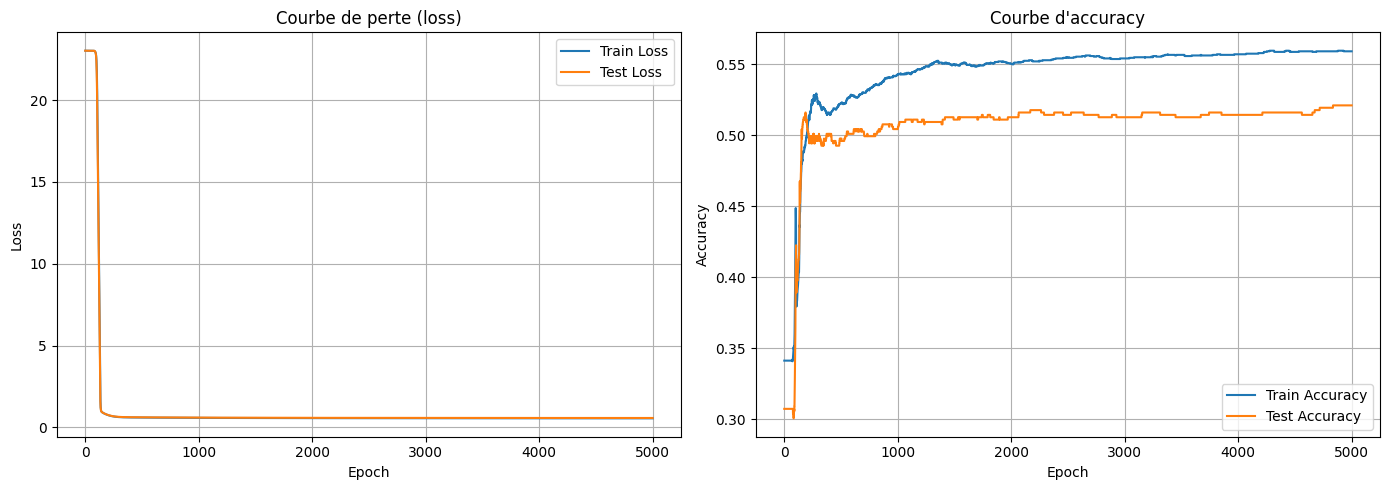

In [21]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Courbe de perte (Loss)
axs[0].plot(model.train_loss, label='Train Loss')
axs[0].plot(model.test_loss, label='Test Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Courbe de perte (loss)')
axs[0].grid(True)
axs[0].legend()

# Courbe d'accuracy
axs[1].plot(model.train_accuracy, label='Train Accuracy')
axs[1].plot(model.test_accuracy, label='Test Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Courbe d\'accuracy')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()